## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0720 11:17:30.801399  5180 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0720 11:17:30.802400  5180 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0720 11:17:30.815399  5180 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 11:17:30.816399  5180 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 11:17:30.817399  5180 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 6s 127us/step - loss: 1.8811 - acc: 0.3287 - val_loss: 1.7154 - val_acc: 0.3978
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.6737 - acc: 0.4065 - val_loss: 1.6937 - val_acc: 0.3975
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5858 - acc: 0.4376 - val_loss: 1.5521 - val_acc: 0.4477
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5265 - acc: 0.4592 - val_loss: 2.1287 - val_acc: 0.3199
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.4824 - acc: 0.4705 - val_loss: 1.5584 - val_acc: 0.4378
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.4430 - acc: 0.4899 - val_loss: 1.5515 - val_acc: 0.4502
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4065 - acc: 0.5013 - val_loss: 1.5200 - val_acc: 0.4601
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 124us/step - loss: 1.9409 - acc: 0.3216 - val_loss: 1.8911 - val_acc: 0.3313
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.8535 - acc: 0.3520 - val_loss: 1.8232 - val_acc: 0.3626
Epoch 4/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.8023 - acc: 0.3717 - val_loss: 1.7886 - val_acc: 0.3733
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.7651 - acc: 0.3845 - val_loss: 1.7539 - val_acc: 0.3842
Epoch 6/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7347 - acc: 0.3938 - val_loss: 1.7284 - val_acc: 0.3967
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.7074 - acc: 0.4040 - val_loss: 1.7030 - val_acc: 0.4041
Epoch 8/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6838 - acc: 0.4137 - val_loss: 1.6836 - val_acc: 0.4084
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 6s 124us/step - loss: 2.1704 - acc: 0.2205 - val_loss: 2.1491 - val_acc: 0.2323
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.1314 - acc: 0.2426 - val_loss: 2.1131 - val_acc: 0.2530
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0983 - acc: 0.2571 - val_loss: 2.0825 - val_acc: 0.2640
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0694 - acc: 0.2702 - val_loss: 2.0559 - val_acc: 0.2760
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0444 - acc: 0.2797 - val_loss: 2.0329 - val_acc: 0.2842
Epoch 8/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0224 - acc: 0.2881 - val_loss: 2.0127 - val_acc: 0.2932
Epoch 9/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.0032 - acc: 0.2967 - val_loss: 1.9947 - val_acc: 0.2997
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 122us/step - loss: 2.3048 - acc: 0.0974 - val_loss: 2.3009 - val_acc: 0.1050
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2958 - acc: 0.1125 - val_loss: 2.2931 - val_acc: 0.1236
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2886 - acc: 0.1274 - val_loss: 2.2866 - val_acc: 0.1360
Epoch 7/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2824 - acc: 0.1370 - val_loss: 2.2809 - val_acc: 0.1452
Epoch 8/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2768 - acc: 0.1456 - val_loss: 2.2758 - val_acc: 0.1496
Epoch 9/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.2717 - acc: 0.1534 - val_loss: 2.2709 - val_acc: 0.1556
Epoch 10/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2668 - acc: 0.1609 - val_loss: 2.2663 - val_acc: 0.1619
Epoch 11/50
50000/50000 [===================

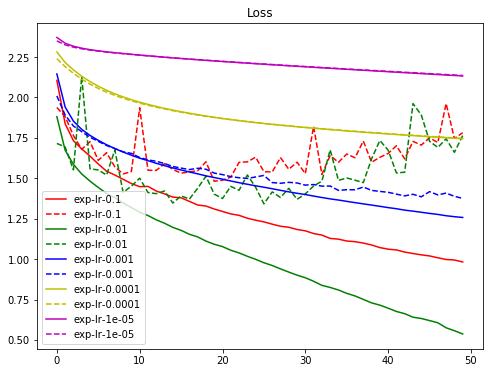

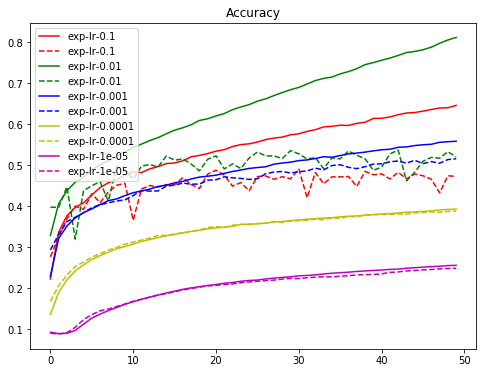

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()